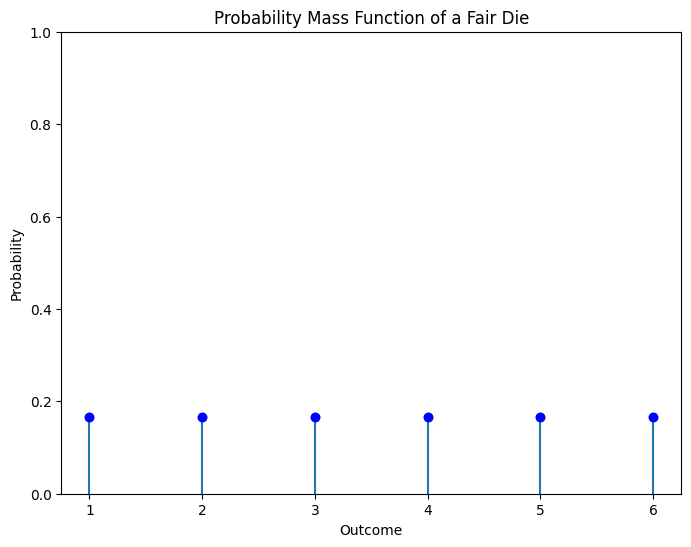

In [1]:
import matplotlib.pyplot as plt

# 이산 확률변수 X의 가능한 값과 해당 확률
x_values = [1, 2, 3, 4, 5, 6]
probabilities = [1/6 for _ in x_values]

# 그래프 설정
plt.figure(figsize=(8, 6))
plt.stem(x_values, probabilities, basefmt=" ")      # 막대(stem) 그래프
plt.plot(x_values, probabilities, 'o', color='blue') # 점 표시

# y축 스케일 설정
plt.ylim(0, 1)

# 제목 및 축 이름
plt.title('Probability Mass Function of a Fair Die')
plt.xlabel('Outcome')
plt.ylabel('Probability')

# 그래프 출력
plt.show()

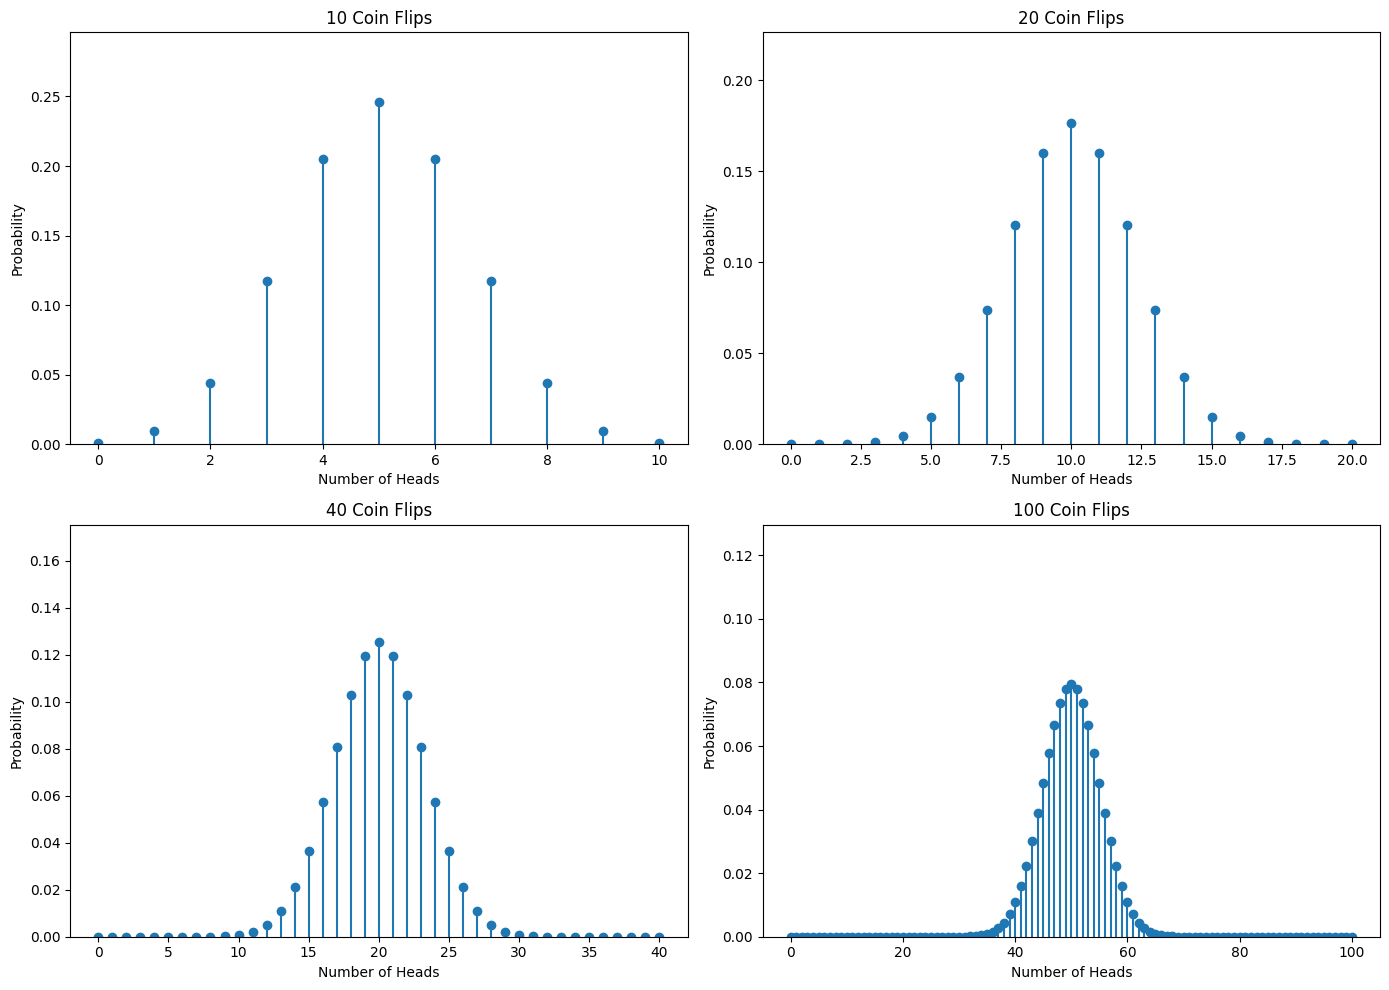

In [2]:
!pip install scipy

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 동전 던지기 횟수 설정: 10회, 20회, 40회, 100회
n_values = [10, 20, 40, 100]
p = 0.5  # 동전의 앞면이 나올 확률

# 그래프 설정
plt.figure(figsize=(14, 10))

for i, n in enumerate(n_values, 1):
    x = np.arange(0, n + 1)
    pmf_values = stats.binom.pmf(x, n, p)

    plt.subplot(2, 2, i)  # 2x2 subplot 생성
    plt.stem(x, pmf_values, linefmt='C0-', markerfmt='C0o', basefmt=" ")  # 막대(stem) 그래프

    plt.title(f'{n} Coin Flips')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability')
    plt.ylim(0, max(pmf_values) + 0.05)

plt.tight_layout()
plt.show()

Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


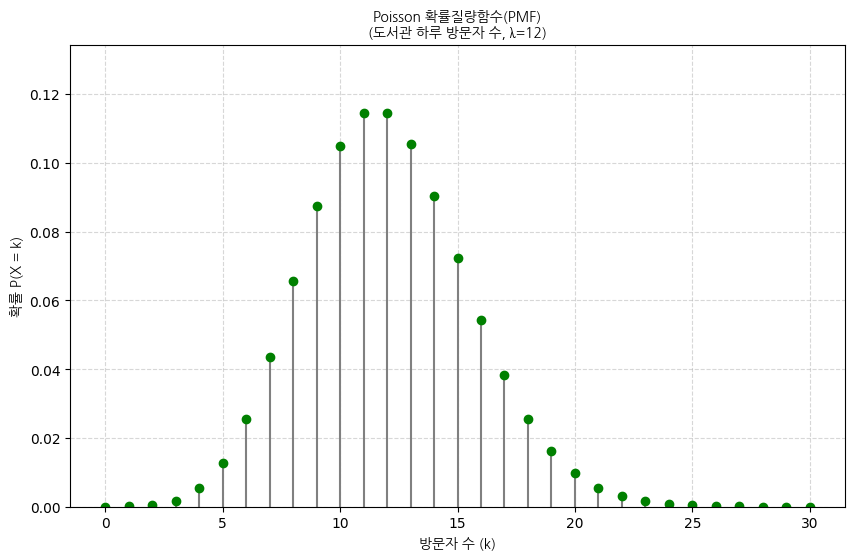

In [3]:
# 1. 나눔고딕 폰트 설치
!apt-get -qq -y install fonts-nanum

# 2. 런타임에 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
from scipy.stats import poisson

# 3. 설치된 나눔고딕 폰트를 직접 경로로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 4. Poisson 분포 PMF 시각화
lambda_val = 12
k_values = np.arange(0, 31)
pmf_values = poisson.pmf(k_values, lambda_val)

plt.figure(figsize=(10, 6))

markerline, stemlines, baseline = plt.stem(k_values, pmf_values, basefmt=" ")

plt.setp(markerline, color='green', marker='o')
plt.setp(stemlines, color='gray')
plt.setp(baseline, visible=False)

# 한글 제목과 라벨
plt.title('Poisson 확률질량함수(PMF)\n(도서관 하루 방문자 수, λ=12)', fontproperties=font_prop)
plt.xlabel('방문자 수 (k)', fontproperties=font_prop)
plt.ylabel('확률 P(X = k)', fontproperties=font_prop)

plt.ylim(0, max(pmf_values) + 0.02)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

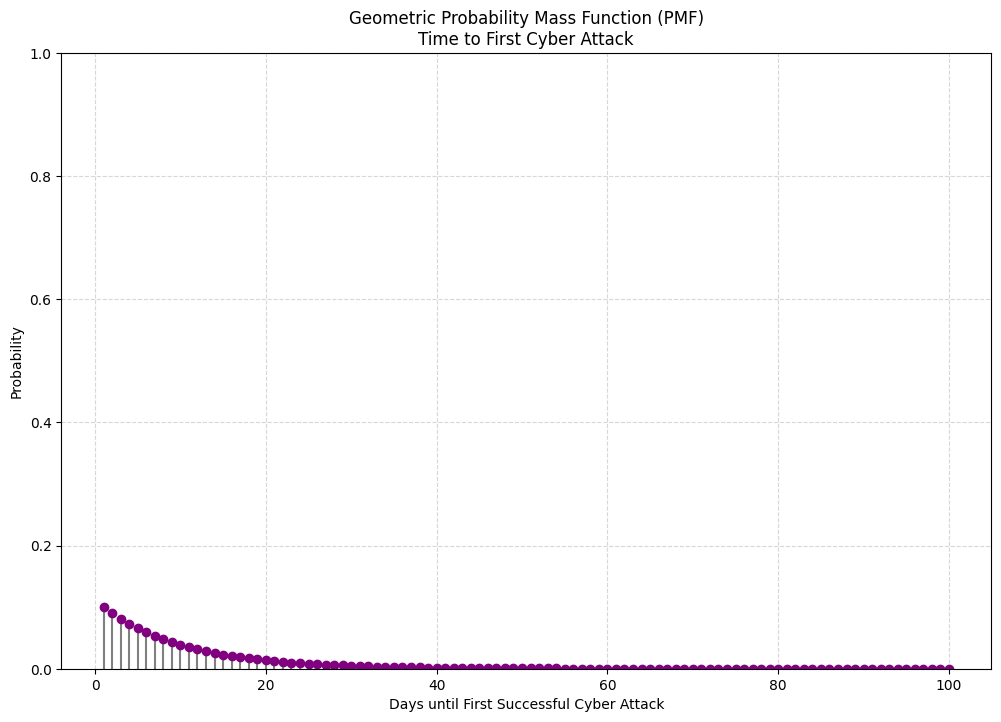

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 기하분포의 매개변수 설정: 성공확률 p
p = 0.1

# k의 가능한 값 설정: 1일부터 100일까지
k_values = np.arange(1, 101)

# 확률질량함수(PMF) 계산
pmf_values = (1 - p) ** (k_values - 1) * p

# 그래프 설정
plt.figure(figsize=(12, 8))

markerline, stemlines, baseline = plt.stem(k_values, pmf_values, basefmt=" ")
plt.setp(markerline, color='purple', marker='o')
plt.setp(stemlines, color='gray')
plt.setp(baseline, visible=False)

# y축 범위 설정
plt.ylim(0, 1)

# 그래프 제목 및 축 이름
plt.title('Geometric Probability Mass Function (PMF)\nTime to First Cyber Attack')
plt.xlabel('Days until First Successful Cyber Attack')
plt.ylabel('Probability')

# 격자 추가
plt.grid(True, linestyle='--', alpha=0.5)

# 그래프 보여주기
plt.show()

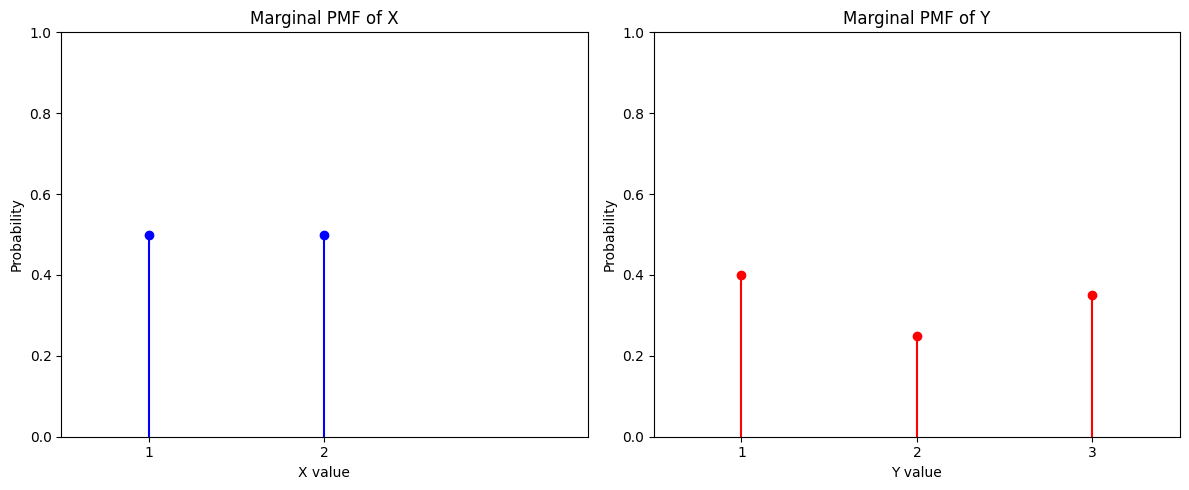

In [ ]:
import matplotlib.pyplot as plt

# 결합확률질량함수 데이터
joint_pmf_data = {
    (1, 1): 0.1,
    (1, 2): 0.2,
    (1, 3): 0.2,
    (2, 1): 0.3,
    (2, 2): 0.05,
    (2, 3): 0.15
}

# X와 Y의 주변확률밀도함수 계산
f_X = {}
f_Y = {}

# X의 주변확률밀도함수 계산
for x, y in joint_pmf_data.keys():
    f_X[x] = f_X.get(x, 0) + joint_pmf_data[(x, y)]

# Y의 주변확률밀도함수 계산
for x, y in joint_pmf_data.keys():
    f_Y[y] = f_Y.get(y, 0) + joint_pmf_data[(x, y)]

# Y축의 범위를 0부터 1까지, X축의 범위를 동일하게 설정하여 그래프 그리기
plt.figure(figsize=(12, 5))

# Y축의 범위 설정
y_min = 0
y_max = 1

# X축의 범위 설정
x_min = 0.5
x_max = 3.5

# X의 주변확률밀도함수 그래프
plt.subplot(1, 2, 1)
plt.plot(list(f_X.keys()), list(f_X.values()), 'bo')  # 점
plt.vlines(list(f_X.keys()), y_min, list(f_X.values()), colors='blue')  # 수선의 발
plt.title('Marginal PMF of X')
plt.xlabel('X value')
plt.ylabel('Probability')
plt.xticks(list(f_X.keys()))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Y의 주변확률밀도함수 그래프
plt.subplot(1, 2, 2)
plt.plot(list(f_Y.keys()), list(f_Y.values()), 'ro')  # 점
plt.vlines(list(f_Y.keys()), y_min, list(f_Y.values()), colors='red')  # 수선의 발
plt.title('Marginal PMF of Y')
plt.xlabel('Y value')
plt.ylabel('Probability')
plt.xticks(list(f_Y.keys()))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# 국어 성적과 수학 성적 데이터
korean_scores = [75, 65, 50, 70, 80]
math_scores = [65, 70, 70, 55, 60]

# 데이터를 NumPy 배열로 변환
data = np.array([korean_scores, math_scores])

# 공분산 계산 (모집단 공분산: bias=True)
covariance = np.cov(data, bias=True)[0, 1]

# 결과 출력
print("Covariance:", covariance)


Covariance: -37.0


In [ ]:
import numpy as np

# 데이터
x = np.array([4, 6, -4, 10])
y = np.array([-1, 5, 3, 18])

# 상관계수 계산
correlation = np.corrcoef(x, y)[0, 1]

# 결과 출력
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.6473374795169565


In [ ]:
def conditional_probability(prob_a_and_b: float, prob_b: float) -> float:
    """조건부확률 P(A|B) = P(A∩B) / P(B)를 계산한다."""
    if prob_b == 0:
        raise ZeroDivisionError("P(B)가 0이면 조건부확률을 계산할 수 없습니다.")
    return prob_a_and_b / prob_b

# 주어진 확률값
prob_a = 0.6           # 빵을 살 확률 (여기선 미사용)
prob_b = 0.4           # 우유를 살 확률
prob_a_and_b = 0.3     # 빵도 사고 우유도 살 확률

# 조건부확률 계산
prob_a_given_b = conditional_probability(prob_a_and_b, prob_b)
print("우유를 산 경우에 빵을 살 확률:", f"{prob_a_given_b:.2f}")  # 0.75 출력
# 또는: print("우유를 산 경우에 빵을 살 확률:", round(prob_a_given_b, 2))


우유를 산 경우에 빵을 살 확률: 0.75


In [ ]:
def conditional_probability(prob_a_and_b, prob_b):
    """조건부확률을 계산하는 함수
    :param prob_a_and_b: 사건 A와 B가 동시에 일어날 확률
    :param prob_b: 사건 B가 일어날 확률
    :return: 조건부확률 P(A|B)
    """
    return prob_a_and_b / prob_b

# 주어진 확률값
prob_a = 0.6   # 빵을 살 확률
prob_b = 0.4   # 우유를 살 확률
prob_a_and_b = 0.3   # 빵도 사고 우유도 살 확률

# 조건부확률 계산
prob_a_given_b = conditional_probability(prob_a_and_b, prob_b)
print("우유를 산 경우에 빵을 살 확률:", prob_a_given_b)


우유를 산 경우에 빵을 살 확률: 0.7499999999999999


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52384 (\N{HANGUL SYLLABLE CEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

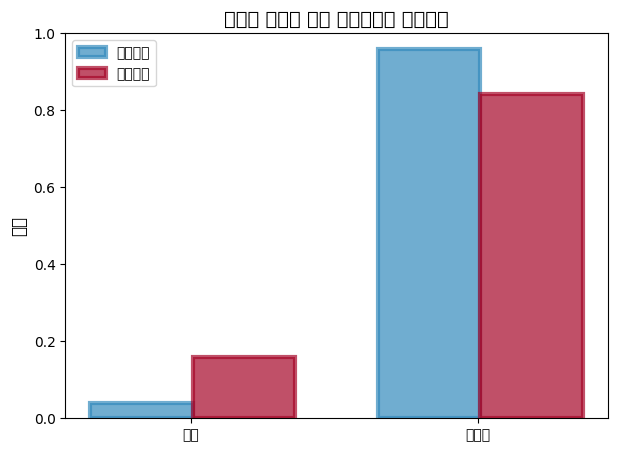

In [ ]:
# =====================================
# 1. 나눔고딕 폰트 설치
# =====================================
!apt-get -qq -y install fonts-nanum > /dev/null

# =====================================
# 2. 런타임 폰트 설정
# =====================================
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import numpy as np

# 폰트를 나눔고딕으로 설정
matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# =====================================
# 3. 확률 데이터 설정
# =====================================
colors = ['#348ABD', "#A60628"]
prior = [1/25., 24/25.]        # 사전확률: [P(가수), P(직장인)]
posterior = [0.158, 1 - 0.158] # 사후확률: [P(가수|X), P(직장인|X)]

# =====================================
# 4. 시각화
# =====================================
plt.figure(figsize=(7,5))
# 사전확률 바
plt.bar([0, 0.7], prior, alpha=0.7, width=0.25,
        color=colors[0], label="사전확률", lw=3, edgecolor='#348ABD')

# 사후확률 바
plt.bar([0+0.25, 0.7+0.25], posterior, alpha=0.7, width=0.25,
        color=colors[1], label='사후확률', lw=3, edgecolor='#A60628')

# 라벨 및 제목
plt.xticks([0.12, 0.82], ['가수', '직장인'])
plt.title('철수의 직업에 대한 사전확률과 사후확률', fontsize=14)
plt.ylabel('확률', fontsize=12)
plt.legend(loc='upper left')
plt.ylim(0, 1)

plt.show()


In [ ]:
a = [2, 3, 4, 5, 6]
rev_a = []
for _ in range(len(a)):
    rev_a.append(a.pop())

print(rev_a)

[6, 5, 4, 3, 2]


In [ ]:
import random
trials=10000
even_rolls_count=0
for i in range(trials):
  roll=random.randint(1,6)
  if roll%2==0:
    even_rolls_count+=1
probability_even=even_rolls_count/trials
probability_even

0.4968

In [ ]:
S={1,2,3,4,5,6}
A={1,2}
B={1,3,5}
union_AB=A.union(B)
intersection_AB=A.intersection(B)
complement_A=S.difference(A)
complement_B=S.difference(B)
union_AB,intersection_AB,complement_A,complement_B

({1, 2, 3, 5}, {1}, {3, 4, 5, 6}, {2, 4, 6})

In [ ]:
red_balls=2
blue_balls=3
green_balls=5
favorable_outcomes=red_balls
total_outcomes=red_balls+blue_balls+green_balls
probability=favorable_outcomes/total_outcomes
probability

0.2

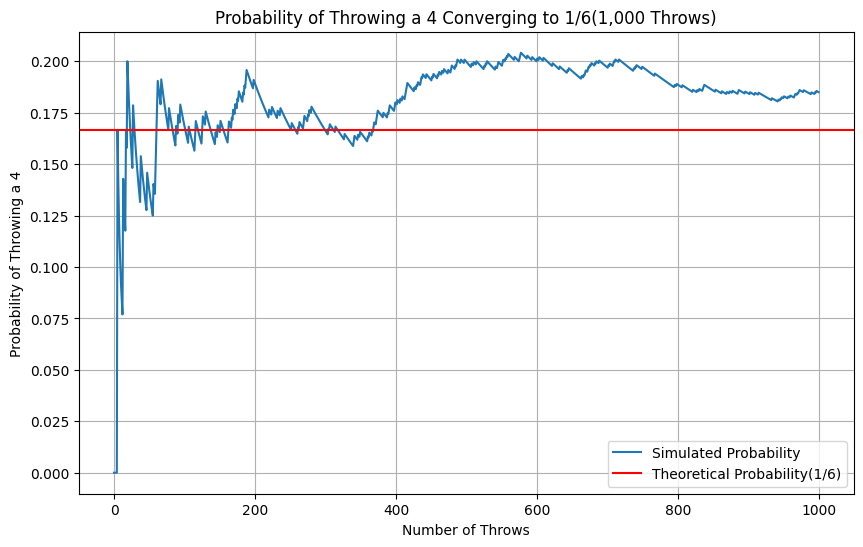

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n_throws_short=1000
throws_short=np.random.randint(1,7,size=n_throws_short)
fours_count_short=np.zeros(n_throws_short)
for i in range(1,n_throws_short):
  fours_count_short[i]=fours_count_short[i-1]+(throws_short[i]==4)
probabilities_short=fours_count_short/np.arange(1,n_throws_short+1)
plt.figure(figsize=(10,6))
plt.plot(probabilities_short,label='Simulated Probability')
plt.axhline(y=1/6,color='r',linestyle='-',label='Theoretical Probability(1/6)')
plt.xlabel('Number of Throws')
plt.ylabel('Probability of Throwing a 4')
plt.title('Probability of Throwing a 4 Converging to 1/6(1,000 Throws)')
plt.legend()
plt.grid(True)
plt.show()

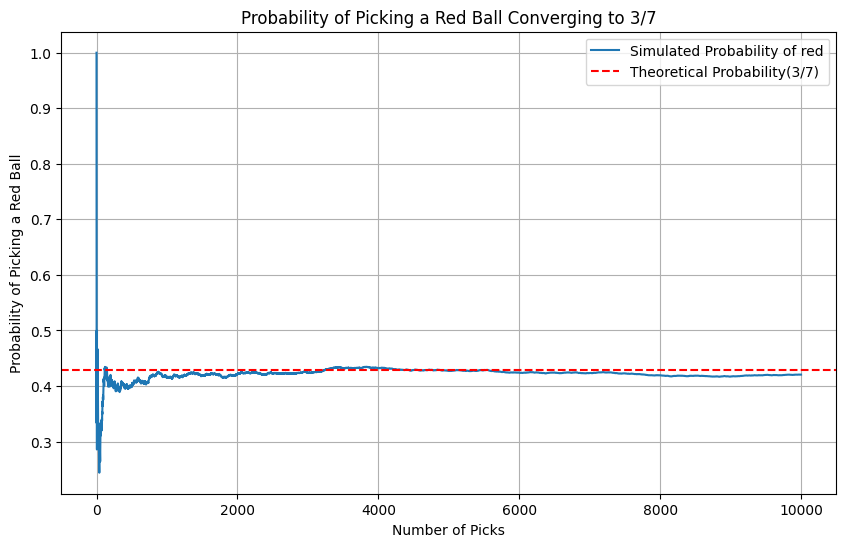

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
bag=['R']*3+['B']*4
n_picks=10000
picks=np.random.choice(bag,size=n_picks,replace=True)
red_count_cumulative=np.cumsum(picks=='R')
probabilities_red_cumulative=red_count_cumulative/np.arange(1,n_picks+1)
plt.figure(figsize=(10,6))
plt.plot(probabilities_red_cumulative,label='Simulated Probability of red')
plt.axhline(y=3/7,color='r',linestyle='--',label='Theoretical Probability(3/7)')
plt.xlabel('Number of Picks')
plt.ylabel('Probability of Picking a Red Ball')
plt.title('Probability of Picking a Red Ball Converging to 3/7')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("이름 : 여재은")
print("나이 : 20")

이름 : 여재은
나이 : 20


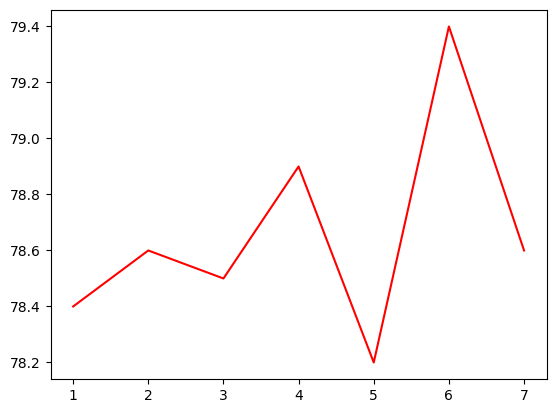

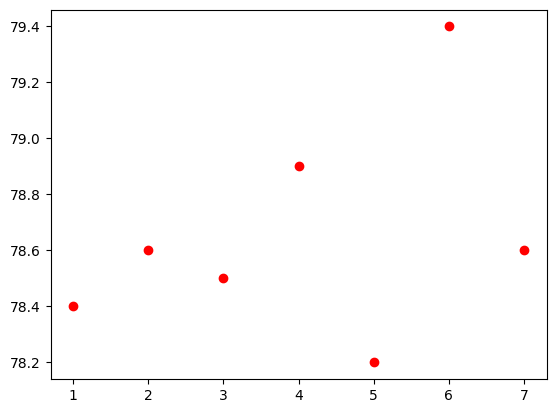

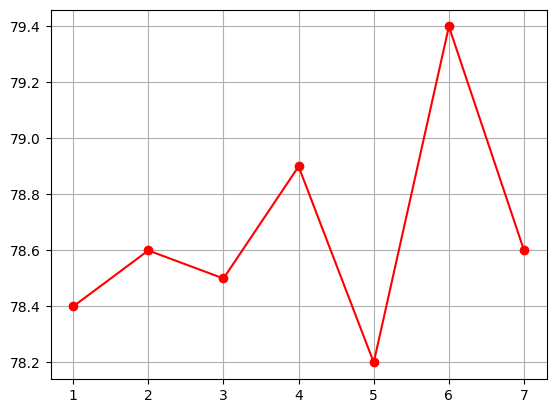

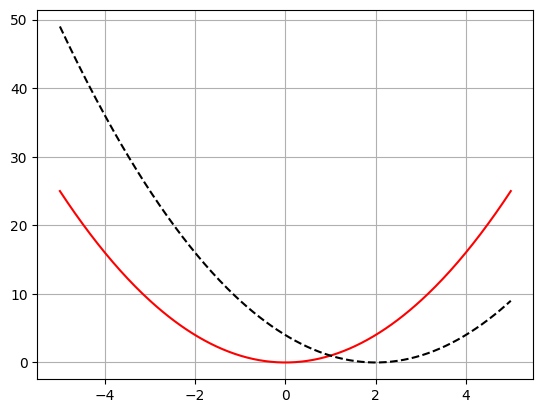

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.7 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5,6,7])
y=np.array([78.4,78.6,78.5,78.9,78.2,79.4,78.6])
plt.plot(x,y,color="r")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5,6,7])
y=np.array([78.4,78.6,78.5,78.9,78.2,79.4,78.6])
plt.scatter(x,y, color="r")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5,6,7])
y=np.array([78.4,78.6,78.5,78.9,78.2,79.4,78.6])
plt.plot(x,y,color='r',marker='o')
plt.grid()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,300)
y1=x**2
y2=(x-2)**2
plt.plot(x,y1,color="r")
plt.plot(x,y2,color="k",linestyle="--")
plt.grid()
plt.show()

!apt-get update -qq
!apt-get install -y fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

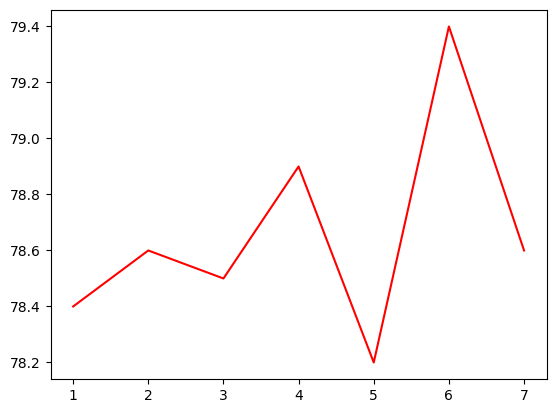

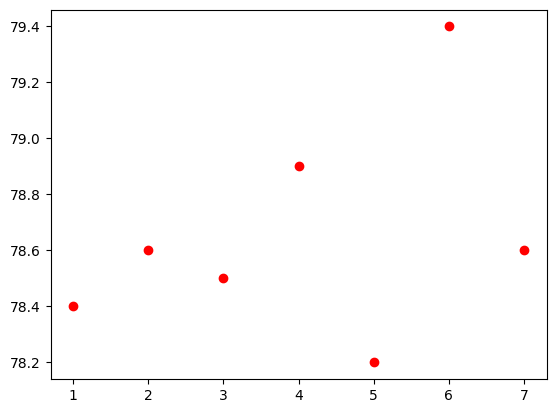

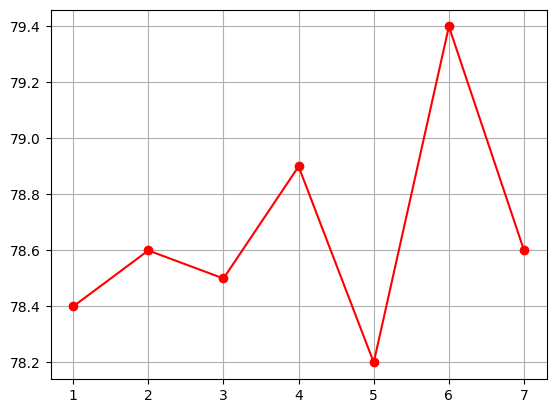

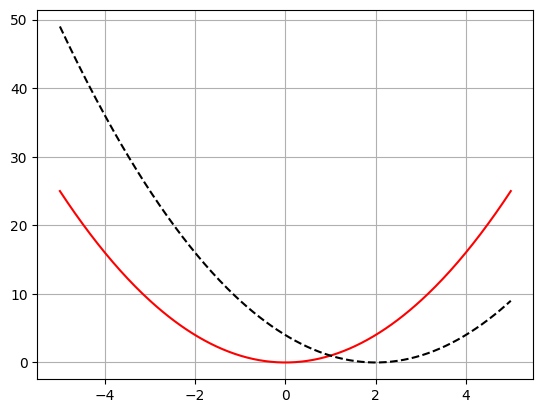

E: Invalid operation update-qq
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5,6,7])
y=np.array([78.4,78.6,78.5,78.9,78.2,79.4,78.6])
plt.plot(x,y,color="r")
plt.show()
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5,6,7])
y=np.array([78.4,78.6,78.5,78.9,78.2,79.4,78.6])
plt.scatter(x,y, color="r")
plt.show()
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5,6,7])
y=np.array([78.4,78.6,78.5,78.9,78.2,79.4,78.6])
plt.plot(x,y,color='r',marker='o')
plt.grid()
plt.show()
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,300)
y1=x**2
y2=(x-2)**2
plt.plot(x,y1,color="r")
plt.plot(x,y2,color="k",linestyle="--")
plt.grid()
plt.show()
!apt-get update-qq
!apt-get install -y fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

평균 점수: 85.66666666666667
중앙값 점수: 87.0
최빈값 점수: 90
범위: 5
분산(모집단): 2.6666666666666665
분산(표본): 3.0
표준편차(모집단): 1.632993161855452
표준편차(표본): 1.7320508075688772
변동계수: 0.4453617714151233


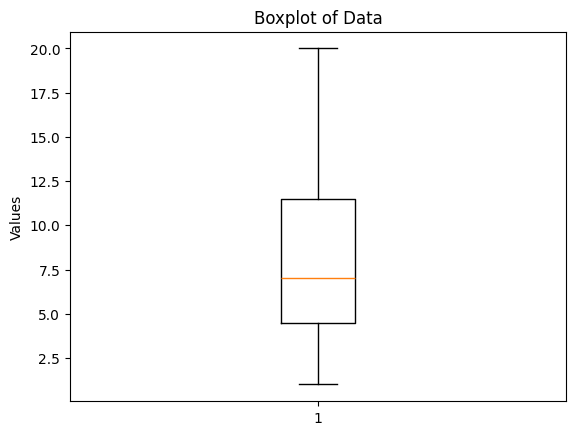

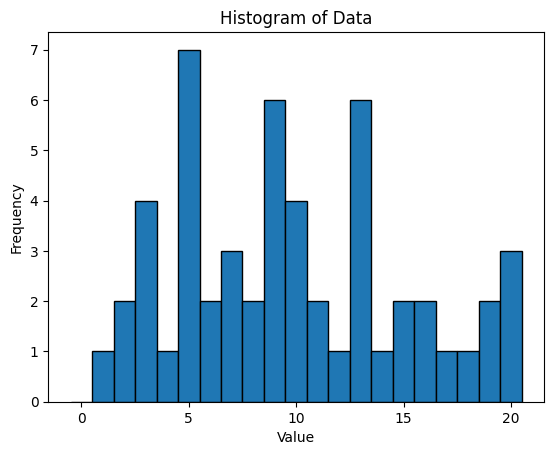

In [ ]:
import numpy as np
from statistics import mode
from scipy import stats
exam_scores = [82, 90, 76, 92, 88, 79, 95, 87, 90, 76, 92, 90, 85, 78, 85]
mean_score = np.mean(exam_scores)
median_score = np.median(exam_scores)
try:
  mode_score = mode(exam_scores)
except:
  mode_score = stats.mode(exam_scores)[0][0]
print(f"평균 점수: {mean_score}")
print(f"중앙값 점수: {median_score}")
print(f"최빈값 점수: {mode_score}")

import numpy as np
from scipy.stats import variation
data = [1, 2, 2, 3, 4, 5, 5, 5, 6]
data_range = np.max(data) - np.min(data)
variance = np.var(data, ddof=0)
sample_variance = np.var(data, ddof=1)
std_deviation = np.std(data, ddof=0)
sample_std_deviation = np.std(data, ddof=1)
cv = variation(data)
print(f"범위: {data_range}")
print(f"분산(모집단): {variance}")
print(f"분산(표본): {sample_variance}")
print(f"표준편차(모집단): {std_deviation}")
print(f"표준편차(표본): {sample_std_deviation}")
print(f"변동계수: {cv}")

import matplotlib.pyplot as plt
data = [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
plt.boxplot(data)
plt.title("Boxplot of Data")
plt.ylabel("Values")
plt.show()

import matplotlib.pyplot as plt
data = [1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 12, 13, 13, 13, 13, 13, 13, 14, 15, 15, 16, 16, 17, 18, 19, 19, 20, 20, 20]
bins = np.arange(0, max(data) + 1.5) - 0.5
plt.hist(data, bins = bins, edgecolor = 'black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()